In [1]:
import importlib

import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import utils_primitives as up
#importlib.reload(up)
#from utils_primitives import *
from skimage import measure, morphology



## Sphere

The sphere surface area is calculated by formula
$$ A = 4\pi r^2 $$

The volume is calculated bz formula
$$  V = \frac{4}{3}\pi r^3 $$

We calculate vales in units, pretending that resolution = 1. Therefore surface area is expressed in square units, and volume - in cubic units.
In real conditions we multiply linear values by resolution, area values - by resolution squered, and volume values - by resulution in cube.
For example, when in units radius is 10, surface area found is 1372.04 and volume is 4169 then with resolution 0.1 mm the real word values will be the following
$$radius = 10 \cdot  0.1 = 1 mm$$ 
$$surface = 1372.04 \cdot  0.1^2 = 13.72 mm^2$$  
$$volume = 4169 \cdot 0.1^3 = 4.169 mm^3$$

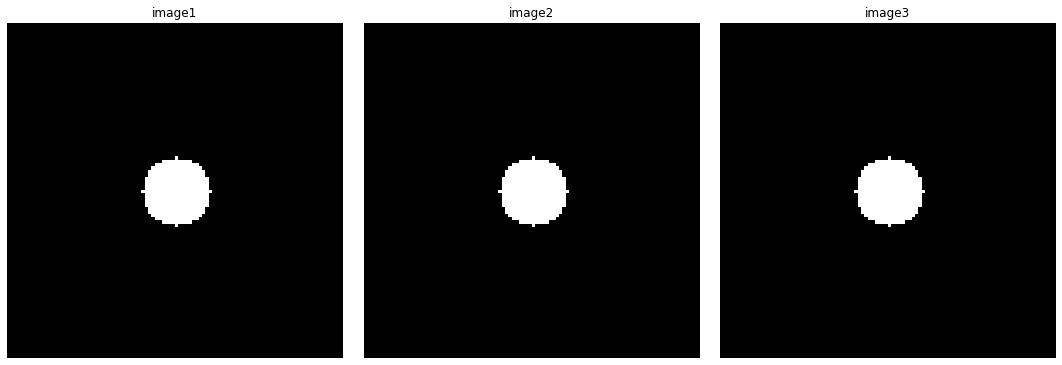

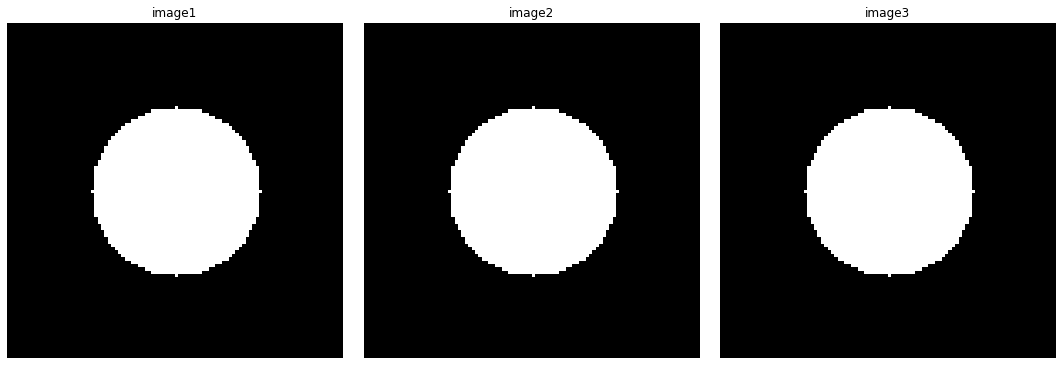

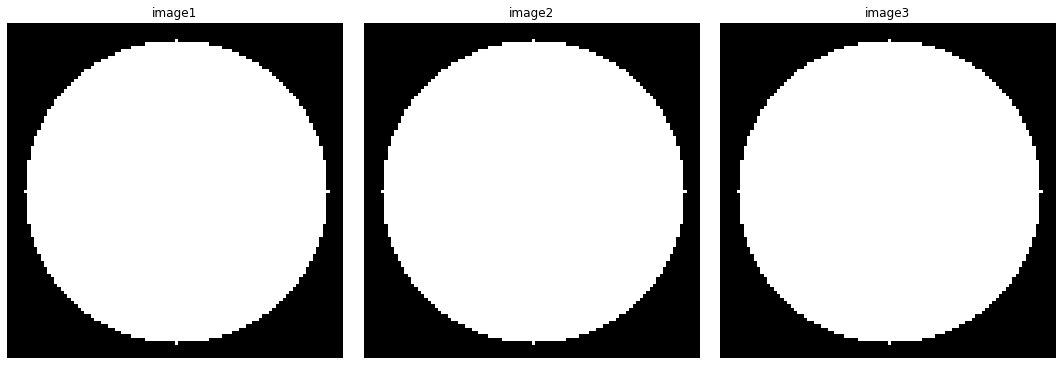

,name,radius,height,surface by formula,surface by algorithm,"difference area, %",volume by formula,volume count,"difference volume, %"
0,sphere,10,None,1256.64,1372.04,9.18,4188.79,4169,-0.47
1,sphere,25,None,7853.98,8538.90,8.72,65449.85,65267,-0.28
2,sphere,45,None,25446.90,27675.87,8.76,381703.51,381915,0.06


In [2]:
shape = (100, 100, 100)
slice_ix = shape[0] // 2
radiuses = [10, 25, 45]

save_report = True

areas_formulas = []
areas_march_cubes = []
areas_diffs = []

volume_formulas = []
volume_count = []
volume_diffs = []

for radius in radiuses:
    sphere_image = up.create_sphere(radius, shape)
    verts, faces, normals, values = measure.marching_cubes(sphere_image) # type: ignore    
    surf_area = round(measure.mesh_surface_area(verts, faces),2)
    formula_area = round(4 * np.pi * radius**2, 2)
    difference_relative2 = np.round((surf_area - formula_area)/formula_area * 100, 2)
    
    formula_volume = round(4/3 * np.pi * radius**3, 2)
    volume = np.count_nonzero(sphere_image)
    vol_difference_relative2 = np.round((volume - formula_volume)/formula_volume * 100, 2)
    
    areas_formulas.append(formula_area)
    areas_march_cubes.append(surf_area)
    areas_diffs.append(difference_relative2)
    volume_formulas.append(formula_volume)
    volume_count.append(volume)
    volume_diffs.append(vol_difference_relative2)
        
    up.show_image_projections(sphere_image)
    #up.store_primitive(sphere_image, "sphere_radius_" + str(radius).zfill(3) + ".nii")

df = up.create_dataframe("sphere", radiuses, None, areas_formulas, areas_march_cubes, areas_diffs, volume_formulas, volume_count, volume_diffs)
if save_report:
    up.save_tables(df, "spheres_benchmark_report")

df    

## Cylinder

The sphere surface area is calculated by formula
$$ A = 2\pi rh + 2\pi r^2 $$

The volume is calculated by formula
$$  V = \pi r^2  h $$


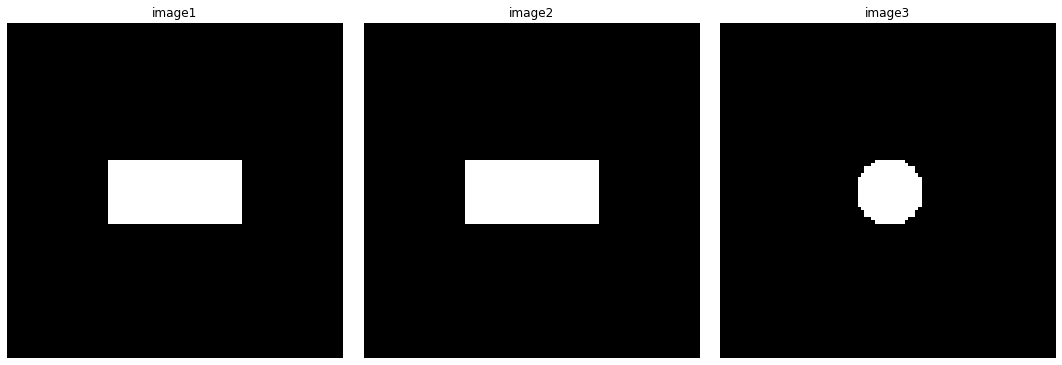

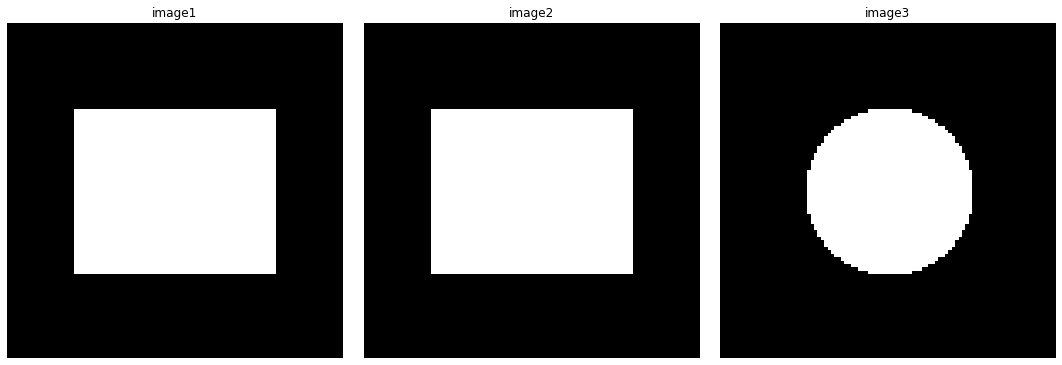

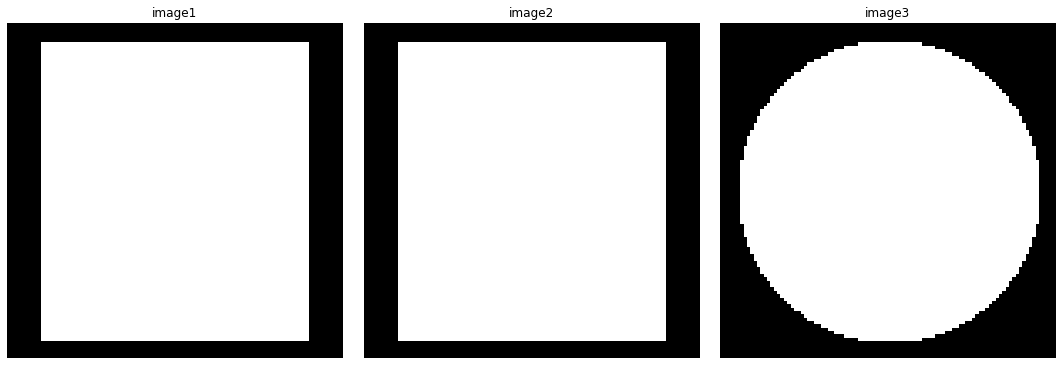

,name,radius,height,surface by formula,surface by algorithm,"difference area, %",volume by formula,volume count,"difference volume, %"
0,cylinder,10,40,3141.592654,3190.791260,1.57,12566.37,12200,-2.92
1,cylinder,25,60,13351.768778,13653.932617,2.26,117809.72,116460,-1.15
2,cylinder,45,80,35342.917353,36237.628906,2.53,508938.01,507920,-0.20


In [5]:
shape = (100, 100, 100)
radiuses = [10, 25, 45]
heights = [40, 60, 80]

areas_formulas = []
areas_march_cubes = []
areas_diffs = []

volume_formulas = []
volume_count = []
volume_diffs = []


for radius, height in zip(radiuses, heights):
    cylinder_image = up.create_cylinder(radius, height, shape)
    formula_area = 2 * np.pi * radius * height + 2 * np.pi* radius**2    
    verts, faces, normals, values = measure.marching_cubes(cylinder_image) # type: ignore    
    surf_area = measure.mesh_surface_area(verts, faces)
    difference_relative2 = np.round((surf_area - formula_area)/formula_area * 100, 2)

    formula_volume = round(np.pi * radius**2 * height, 2)
    volume = np.count_nonzero(cylinder_image) 
    vol_difference_relative2 = np.round((volume - formula_volume)/formula_volume * 100, 2)

    if save_report:
        areas_formulas.append(formula_area)
        areas_march_cubes.append(surf_area)
        areas_diffs.append(difference_relative2)
        volume_formulas.append(formula_volume)
        volume_count.append(volume)
        volume_diffs.append(vol_difference_relative2)
        
    up.show_image_projections(cylinder_image)
    #up.store_primitive(cylinder_image, "cylinder_radius_" + str(radius).zfill(3) + "_height_" + str(height).zfill(3) + ".nii")

df = up.create_dataframe("cylinder", radiuses, heights, areas_formulas, areas_march_cubes, areas_diffs, volume_formulas, volume_count, volume_diffs)
if save_report:
    up.save_tables(df, "cylinder_benchmark_report")

df 

## Cylindroid
A cylindrycal object consisting from cylinder and semispheres on tops.
The surface area of such figure is the surface area of the cylinder without top parts(2πrh) and surface area of the sphere, 
added to tops.
The sphere surface area is calculated by formula
$$ A_{sphere} = 4\pi r^2 $$

The surface area of cylinder without its toppings is found by formula
$$ A_{tube} = 2\pi rh $$

So the total surface area is calculated as:
$$ A = 4\pi r^2  + 2\pi rh $$


The sphere volume is calculated by formula
$$ V_{sphere} = \frac{4}{3}\pi r^3 $$

The volume of cylinder is found by formula
$$ A_{tube} = \pi r^2 h $$

So the total surface area is calculated as:
$$ V = \frac{4}{3}\pi r^3  + \pi r^2 h $$

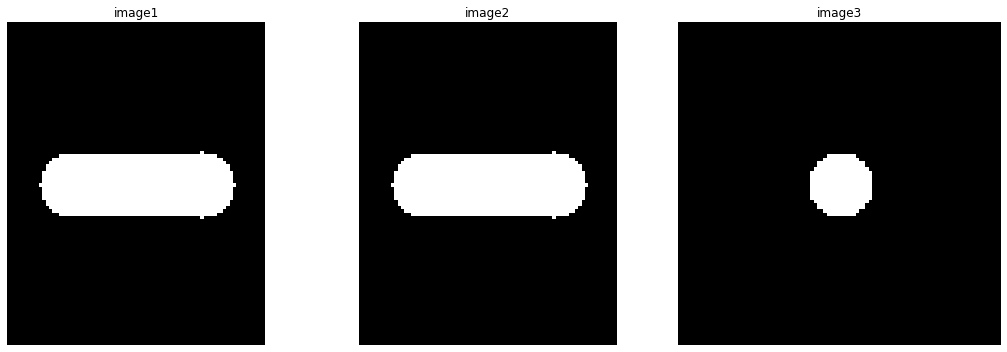

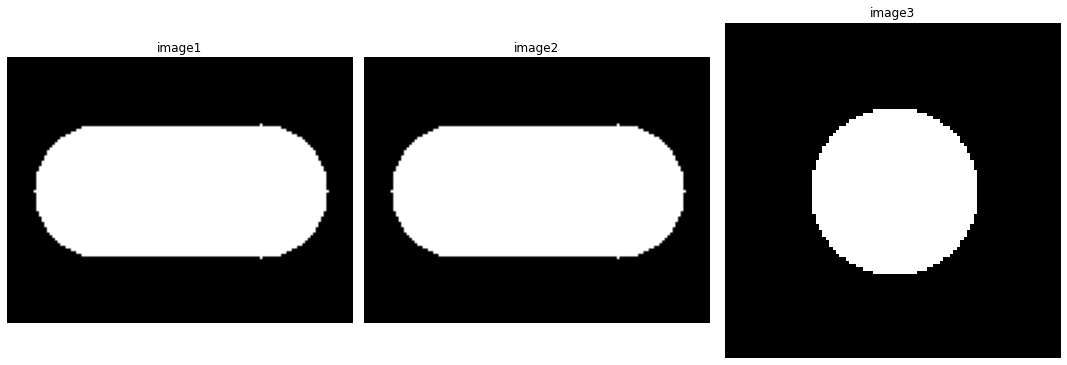

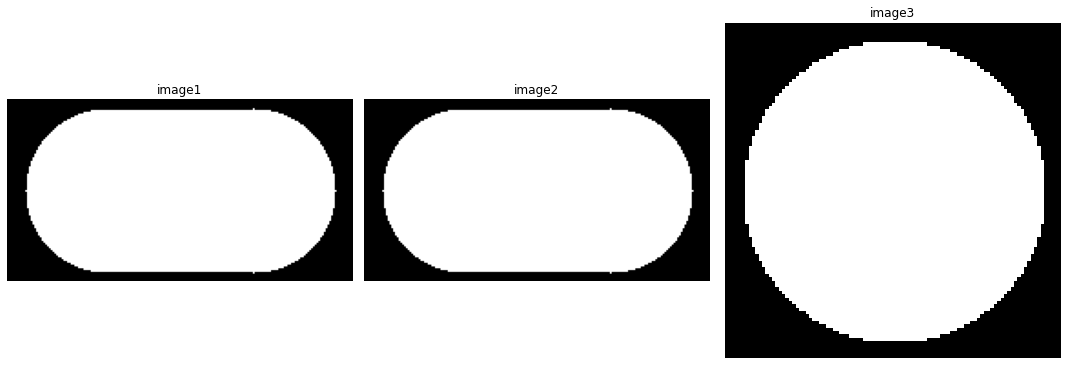

,name,radius,height,surface by formula,surface by algorithm,"difference area, %",volume by formula,volume count,"difference volume, %"
0,cylindroid,10,40,3769.911184,3990.275635,5.85,16755.16,16369,-2.30
1,cylindroid,25,60,17278.759595,18400.951172,6.49,183259.57,181727,-0.84
2,cylindroid,45,80,48066.367600,51375.851562,6.89,890641.52,889835,-0.09


In [7]:
shape = (100, 100, 100)
radiuses = [10, 25, 45]
heights = [40, 60, 80]
extra_space = 20

areas_formulas = []
areas_march_cubes = []
areas_diffs = []

volume_formulas = []
volume_count = []
volume_diffs = []

for radius, height in zip(radiuses, heights):
    cylindroid_image = up.create_cylindroid(radius, height, extra_space, shape)
    formula_area = 2 * np.pi * radius * height + 4 * np.pi * radius**2    
    verts, faces, normals, values = measure.marching_cubes(cylindroid_image) # type: ignore    
    surf_area = measure.mesh_surface_area(verts, faces)
    difference_relative2 = np.round((surf_area - formula_area)/formula_area * 100, 2)
    formula_volume = round(4/3 * np.pi * radius**3 + np.pi * radius**2 * height , 2)
    volume = np.count_nonzero(cylindroid_image)
    vol_difference_relative2 = np.round((volume - formula_volume)/formula_volume * 100, 2)
    
    if save_report:
        areas_formulas.append(formula_area)
        areas_march_cubes.append(surf_area)
        areas_diffs.append(difference_relative2)
        volume_formulas.append(formula_volume)
        volume_count.append(volume)
        volume_diffs.append(vol_difference_relative2)
        
    up.show_image_projections(cylindroid_image)
    #up.store_primitive(cylindroid_image, "cylindroid_radius_" + str(radius).zfill(3) + "_central_height_" + str(height).zfill(3) + ".nii")

df = up.create_dataframe("cylindroid", radiuses, heights, areas_formulas, areas_march_cubes, areas_diffs, volume_formulas, volume_count, volume_diffs)
if save_report:
    up.save_tables(df, "cylindroid_benchmark_report")
    
df     